# Завдання
Завантажити зображення `cat.jpg`.
Провести для цього зображення:
- декомпозицію по складових RGB-моделі
- декомпозицію по складових HSV-моделі
- декомпозицію по складових CIE LAB моделі

## Рішення

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clr
from mpl_toolkits.axes_grid1 import ImageGrid

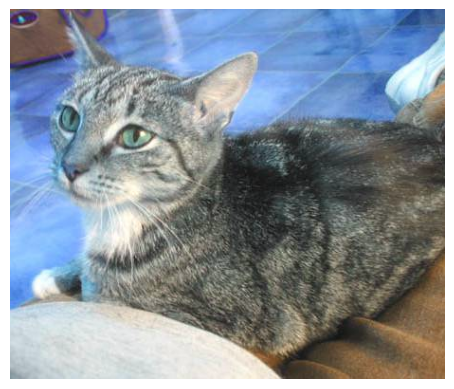

In [14]:
# Завантаження зображення, BRG
img = cv2.imread('cat.jpg')

plt.axis('off')
plt.imshow(img)
plt.show()

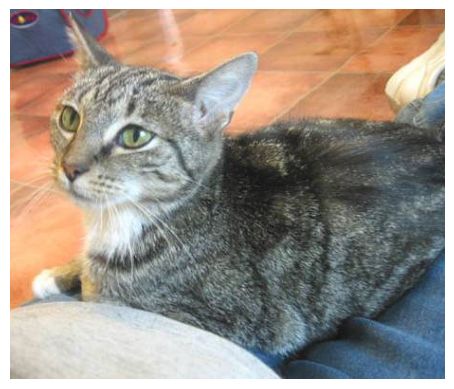

In [15]:
# Конвертуємо в RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_RGB)
plt.show()

# або так
# cv2.imshow("test", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Декомпозиція на складові RGB-моделі

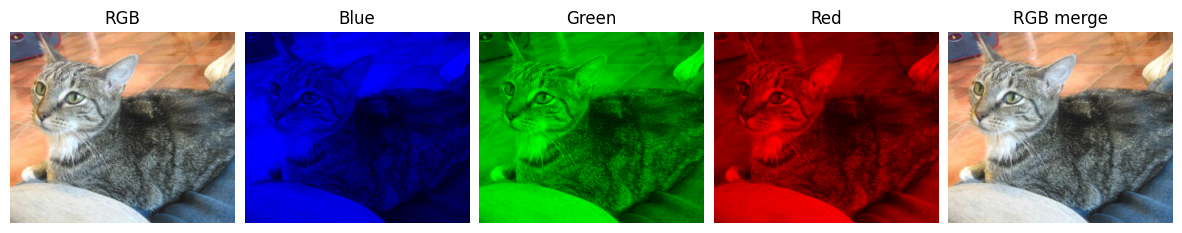

In [16]:
# Декомпозиція на складові RGB-моделі
b,g,r = cv2.split(img)

k = np.zeros_like(b)
blue = cv2.merge([k,k,r])
green = cv2.merge([k,g,k])
red = cv2.merge([b,k,k])

# Об'єднання після декомпозиції
image_merge = cv2.merge((r, g, b))

# Список рисунків
list_images = [img_RGB, blue, green, red, image_merge]

# Візуалізація декомпозиції
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 5),  # сітка 1 на 5
                 axes_pad=0.1  # відстань між рисунками
                 )

titles = ['RGB', 'Blue', 'Green', 'Red', 'RGB merge']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

## Декомпозиція по складових HSV-моделі

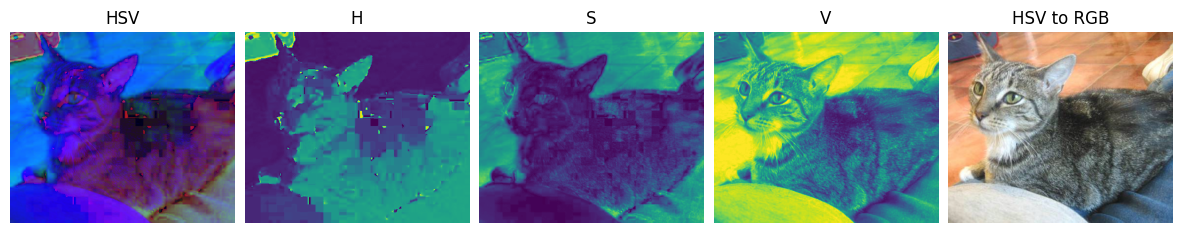

In [17]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_HSV)

HSV_merge = cv2.merge([h, s, v])
out = cv2.cvtColor(HSV_merge, cv2.COLOR_HSV2RGB)

list_images = [img_HSV, h, s, v, out]

titles = ['HSV', 'H', 'S', 'V', 'HSV to RGB']

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 5),
                 axes_pad=0.1,
                 )

for ax, im, titles in zip(grid, list_images, titles):
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)
plt.show()

## Декомпозиція на складові CIE LAB

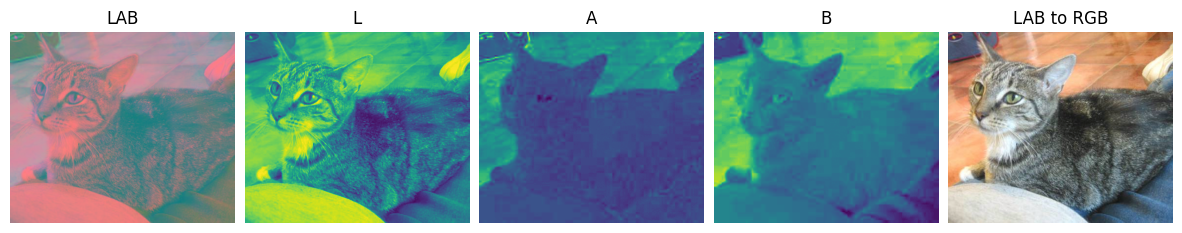

In [18]:
img_LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img_LAB)

LAB_merge = cv2.merge((l, a, b))
out = cv2.cvtColor(img_LAB, cv2.COLOR_LAB2RGB)

list_images = [img_LAB, l, a, b, out]


titles = ['LAB', 'L', 'A', 'B', 'LAB to RGB']

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 5),
                 axes_pad=0.1,
                 )

for ax, im, titles in zip(grid, list_images, titles):
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)
plt.show()